In [436]:
# Research Question: What other aspects of wellness predict whether one uses physical activity as a coping mechanism?

# Survey was given to first-year incoming freshmen students at Truman State University. In this research, I attempt to answer the above question. 

In [517]:
# Load libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingClassifier
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.inspection import permutation_importance

In [438]:
# Load data

data = pd.read_csv("PreTest_ReadyForRStudio.csv")

In [439]:
# Basic full data observations

data.describe()

,Year,Over_18,Full_Time,First_Year_Student,Age,Gender,Sexual_Orientation,Race,Family_Grad_History,Gross_Family_Income,...,Track_Spending,Save_Money,Financial_Anxiety,Career_Financial_Impact,Financial_Obligations_Overwhelming,Job_Necessity,Parent_Financial_Support,Future_Financial_Plan,Contribution,Financial_Score
count,1075.000000,1074.0,1075.0,1074.000000,1074.000000,1058.000000,1059.000000,1071.000000,1070.000000,1054.000000,...,1074.000000,1075.000000,1074.000000,1075.000000,1075.000000,1074.000000,1075.000000,1073.000000,1073.000000,1075.000000
mean,2.399070,1.0,1.0,1.022346,1.163873,1.950851,3.595845,1.455649,1.871963,2.854839,...,2.593110,3.546047,2.187151,3.308837,2.543256,2.801676,3.372093,2.893756,2.809879,29.197209
std,1.153006,0.0,0.0,0.165708,0.502703,0.907993,1.425869,1.439640,0.570116,1.081130,...,1.010287,0.627186,0.977559,0.734534,1.050290,1.074467,0.835191,0.888299,0.884788,4.380016
min,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000
25%,1.000000,1.0,1.0,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,...,2.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,26.000000
50%,2.000000,1.0,1.0,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,3.000000,...,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,29.000000
75%,3.000000,1.0,1.0,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,4.000000,...,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,32.000000
max,4.000000,1.0,1.0,3.000000,7.000000,7.000000,15.000000,8.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,40.000000


In [440]:
# Basic data observations honed in on the Physical_Activity_Scress variable. This is an essential variable for this research.
# Note: The Physical_Activity_Stress variable was an answer to the following question on a scale from 1-4: 
# I use physical activity as a coping mechanism to help deal with stress

data["Physical_Activity_Stress"].describe()

count    1074.000000
mean        2.675047
std         1.010472
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: Physical_Activity_Stress, dtype: float64

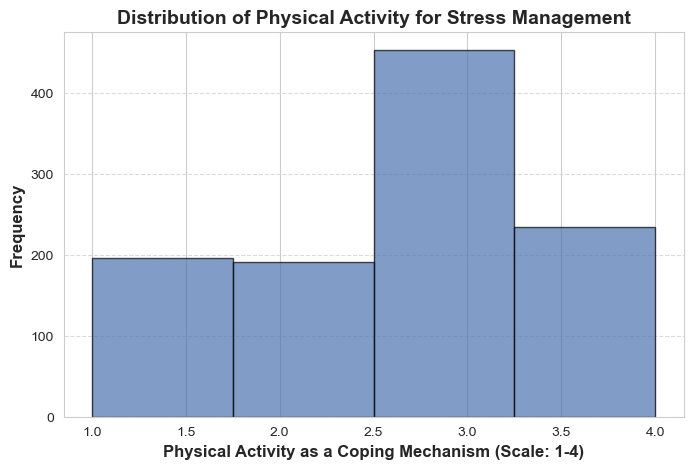

In [441]:
# Basic histogram of the Physical_Activity_Stress variable

sns.set_style("whitegrid")

plt.figure(figsize=(8, 5))
plt.hist(data["Physical_Activity_Stress"], bins=4, color="#4C72B0", edgecolor="black", alpha=0.7)
plt.xlabel('Physical Activity as a Coping Mechanism (Scale: 1-4)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Physical Activity for Stress Management', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

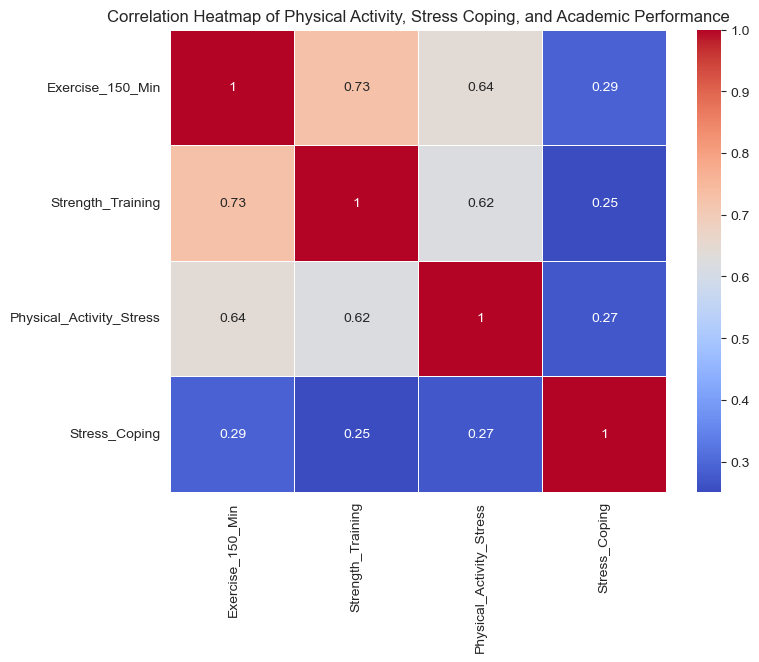

In [442]:
# Correlation heatmap of physical-related variables and Stress_Coping

corr = data[['Exercise_150_Min', 'Strength_Training', 'Physical_Activity_Stress', 'Stress_Coping']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap of Physical Activity, Stress Coping, and Academic Performance")
plt.show()

# Physical_Activity_Stress, Exercise_150_Min, and Strength_Training are positively correlated (≥0.6), which is expected since these variables all relate to physical activity.
# Stress_Coping has a slightly positive correlation (~0.27-0.29) with physical activity variables, indicating that students who engage in more physical activity tend to feel more confident in coping with stress.
# Study_Skills has a slight correlation (~0.23-0.28) with physical activity, but it still suggests a potential positive effect of exercise on academic confidence.

In [443]:
# SIMPLE LINEAR REGRESSION: Does Physical Activity Affect Stress Coping?

# impute by the mean
X_stress = data[['Physical_Activity_Stress']].replace([np.inf, -np.inf], np.nan).fillna(data[['Physical_Activity_Stress']].mean())
y_stress = data['Stress_Coping'].fillna(data['Stress_Coping'].mean()) 

X_stress = sm.add_constant(X_stress)  # Add constant term

# fit the model
model_stress = sm.OLS(y_stress, X_stress).fit()

# Display summary
print(model_stress.summary())

# The output is statistically slightly significant. The R^2 indicates only 7% of the variability is explained by the model.
# Physical_Activity_Stress has a significant positive relationship with Stress_Coping
# More variables will be needed to create a stronger model.

                            OLS Regression Results                            
Dep. Variable:          Stress_Coping   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     84.90
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.61e-19
Time:                        14:59:01   Log-Likelihood:                -1186.0
No. Observations:                1075   AIC:                             2376.
Df Residuals:                    1073   BIC:                             2386.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [444]:
# SIMPLE LINEAR REGRESSION: Does Stress Coping Affect Academic Performance?

X_intellectual = data[['Stress_Coping']]  # Independent variable
y_intellectual = data['Intellectual_Score']  # Dependent variable
X_intellectual = sm.add_constant(X_intellectual)  # regression constant

# fit regression model
model_intellectual = sm.OLS(y_intellectual, X_intellectual).fit()

print(model_intellectual.summary())

# The output is statistically significant. The R^2 indicates that approximately 12.8% of the variability in Intellectual_Score is explained by the model.
# Stress_Coping has a significant positive relationship with Intellectual_Score.
# More variables will be needed to create a stronger model.

                            OLS Regression Results                            
Dep. Variable:     Intellectual_Score   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     157.0
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.01e-33
Time:                        14:59:01   Log-Likelihood:                -2849.4
No. Observations:                1075   AIC:                             5703.
Df Residuals:                    1073   BIC:                             5713.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.0532      0.428     65.557

In [445]:
# Mediation analysis is used to understand the mechanism through which an independent variable
# (Physical_Activity_Stress) affects a dependent variable (Intellectual_Score) through a mediator (Stress_Coping).
# In this analysis, we will examine whether Stress_Coping mediates the relationship between Physical_Activity_Stress and Intellectual_Score.
# For reference, Physical Activity -> Stress Coping -> Intellectual Score

# Impute missing values with the mean for relevant columns
data['Physical_Activity_Stress'] = data['Physical_Activity_Stress'].fillna(data['Physical_Activity_Stress'].mean())
data['Stress_Coping'] = data['Stress_Coping'].fillna(data['Stress_Coping'].mean())
data['Intellectual_Score'] = data['Intellectual_Score'].fillna(data['Intellectual_Score'].mean())

# Residuals for indirect effect (now with imputed data)
X_stress = data[['Physical_Activity_Stress']]
X_stress = sm.add_constant(X_stress)
model_stress = sm.OLS(data['Stress_Coping'], X_stress).fit()

# Add residuals to the data frame for mediation analysis
data['Residual_Stress_Coping'] = model_stress.resid

# Independent variables for the mediation model
X_mediation = data[['Physical_Activity_Stress', 'Residual_Stress_Coping']]
X_mediation = sm.add_constant(X_mediation)

# Fit mediation model
model_mediation = sm.OLS(data['Intellectual_Score'], X_mediation).fit()

# Print results
print(model_mediation.summary())

# The output is statistically significant. The R^2 indicates that approximately 13.9% of the variability in Intellectual_Score is explained by the model.
# Both Physical_Activity_Stress and Residual_Stress_Coping have significant positive relationships with Intellectual_Score.
# More variables will be needed to create a stronger model.


                            OLS Regression Results                            
Dep. Variable:     Intellectual_Score   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     86.82
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           1.13e-35
Time:                        14:59:01   Log-Likelihood:                -2842.2
No. Observations:                1075   AIC:                             5690.
Df Residuals:                    1072   BIC:                             5705.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [446]:
# ---- MULTIVARIATE PREDICTIVE MODELING [FOR INTELLECTUAL_SCORE] -----

# Define predictive variables

predictor_variables = [
    "Study_Skills", "Best_Learning_Pathway", "Problem_Solving",
    "Different_Viewpoints", "Opposing_Viewpoint_Interaction", "Learn_From_Others",
    "Current_Events", "Learn_New_Things", "Creative_Pursuits", "Challenges_Growth"   
] # Removed the Score variables from the predictors

# Data dictionary:

# Study_Skills: I am confident that I have developed effective study skills/habits and am prepared for my coursework
# Best_Learning_Pathway: I typically am able to use my best pathway to learn
# Problem_Solving: I am confident in my ability to solve problems and finish tasks that I start
# Different_Viewpoints: I am interested in learning more about viewpoints different from my own
# Opposing_Viewpoint_Interaction: I regularly engage in conversations with peers/family having opposing viewpoints
# Learn_From_Others: I typically surround myself with others who can help me learn
# Physical_Score: The sum of all responses to physical-related questions
# Relational_Score: The sum of all responses to relational-related questions
# Credit_Hours: How many credit hours will you be taking your first semester?
# Extracurriculars: Do you anticipate being involved in an extracurricular activity this fall? Check all that apply

X = data[predictor_variables] 
y = data["Intellectual_Score"] # Attempting to predict Intellectual Score (this is our closest thing to Academic Performance)

# Impute missing values with the mean, if any

X = X.fillna(X.mean())
y = y.fillna(y.mean())

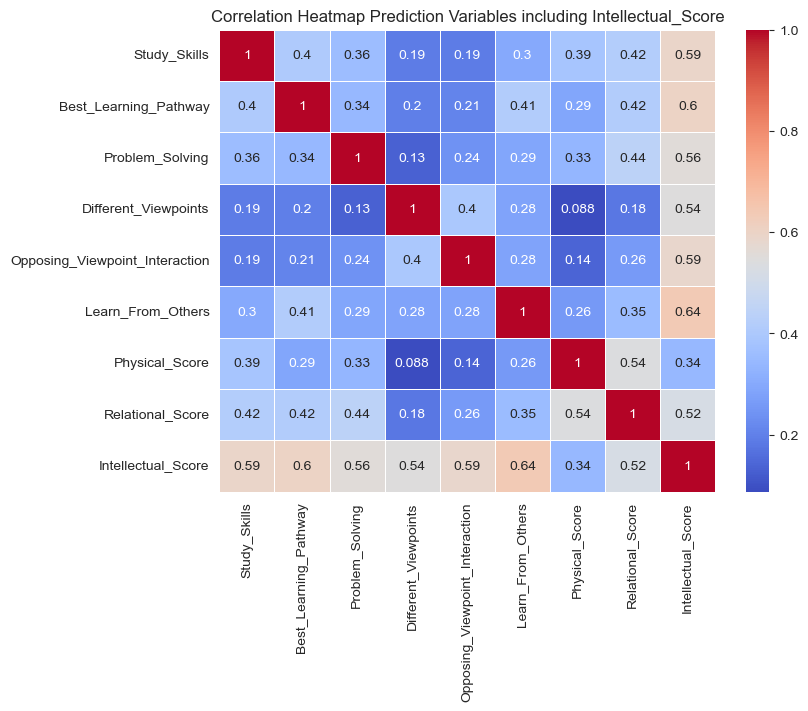

In [447]:
# Examing correlation between our prediction variables [FOR INTELLECTUAL_SCORE]

corr = data[["Study_Skills", "Best_Learning_Pathway", "Problem_Solving",
    "Different_Viewpoints", "Opposing_Viewpoint_Interaction", "Learn_From_Others",
    "Physical_Score", "Relational_Score", 'Intellectual_Score']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap Prediction Variables including Intellectual_Score")
plt.show()

In [448]:
# Splitting testing and training data, also applying feature scaling [FOR INTELLECTUAL_SCORE]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [449]:
# Linear regression model [FOR INTELLECTUAL_SCORE]

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred_linear_reg = linear_reg.predict(X_test_scaled)

# Examine the mean squared error and R^2 value 

print("MSE:", mean_squared_error(y_test, y_pred_linear_reg))
print("R² Score:", r2_score(y_test, y_pred_linear_reg))

MSE: 0.14609819232445628
R² Score: 0.9880545836056737


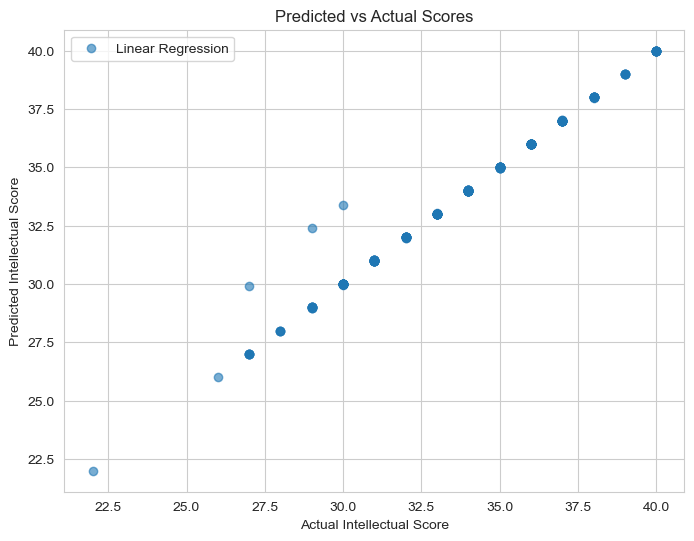

In [450]:
# Visualizing the linear regression model [FOR INTELLECTUAL_SCORE]

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear_reg, alpha=0.6, label="Linear Regression")
plt.xlabel("Actual Intellectual Score")
plt.ylabel("Predicted Intellectual Score")
plt.title("Predicted vs Actual Scores")
plt.legend()
plt.show()

In [451]:
# Random Forest model [FOR INTELLECTUAL_SCORE]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))

MSE: 0.5583516279069767
R² Score: 0.9543475344651315


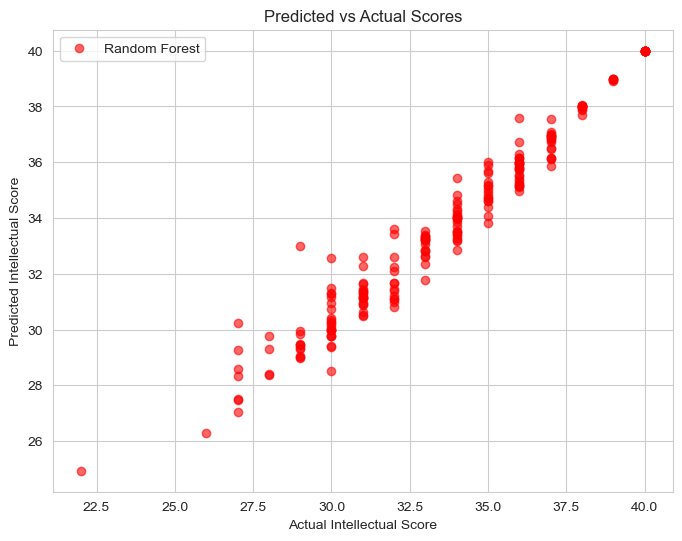

In [452]:
# Random Forest model visualization [FOR INTELLECTUAL_SCORE]

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest", color='red')
plt.xlabel("Actual Intellectual Score")
plt.ylabel("Predicted Intellectual Score")
plt.title("Predicted vs Actual Scores")
plt.legend()
plt.show()

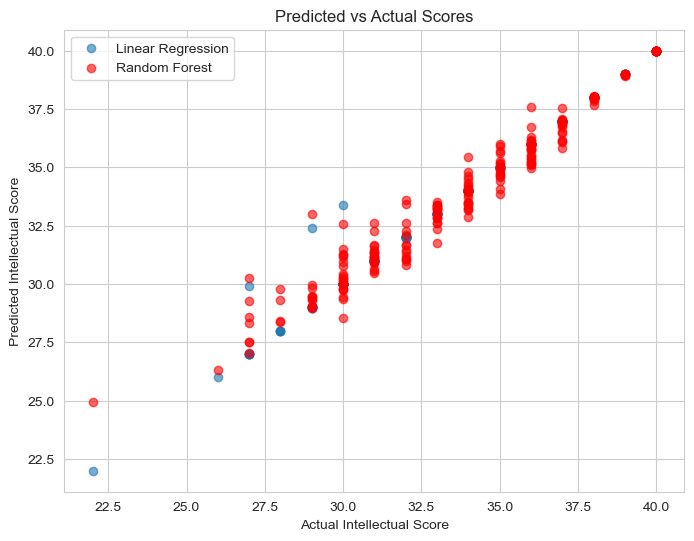

In [453]:
# The output is similar to the output of the linear regression model. It seems that the linear regression model performed a slight bit 
# better than the random forest model.  [FOR INTELLECTUAL_SCORE]

# Let's visualize both of them together

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linear_reg, alpha=0.6, label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest", color='red')
plt.xlabel("Actual Intellectual Score")
plt.ylabel("Predicted Intellectual Score")
plt.title("Predicted vs Actual Scores")
plt.legend()
plt.show()

In [454]:
# Support Vector Regression (SVR) [FOR INTELLECTUAL_SCORE]
 
svr_reg = SVR(kernel='rbf') # using a radial-based function (rbf) kernel, we can fit our data with a non-linear curve.
svr_reg.fit(X_train_scaled, y_train)
y_pred_svr = svr_reg.predict(X_test_scaled)

print("SVR MSE:", mean_squared_error(y_test, y_pred_svr))
print("SVR R^2 Score:", r2_score(y_test, y_pred_svr))

SVR MSE: 0.26542459520060974
SVR R^2 Score: 0.9782981071803716


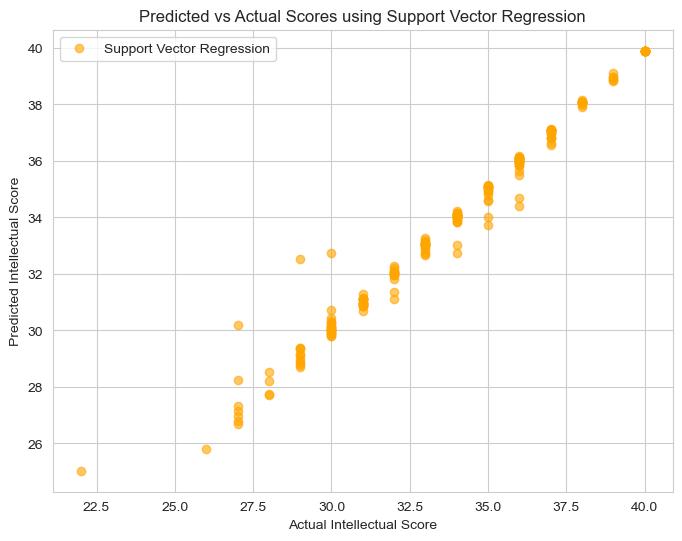

In [455]:
# Support Vector Regression (SVR) visualization [FOR INTELLECTUAL_SCORE]

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_svr, alpha = 0.6, label = "Support Vector Regression", color = 'orange')
plt.xlabel("Actual Intellectual Score")
plt.ylabel("Predicted Intellectual Score")
plt.title("Predicted vs Actual Scores using Support Vector Regression")
plt.legend()
plt.show()

C:\Users\wolzi\AppData\Local\Temp\ipykernel_19176\659325584.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_15_importance_df, palette="Blues_r")


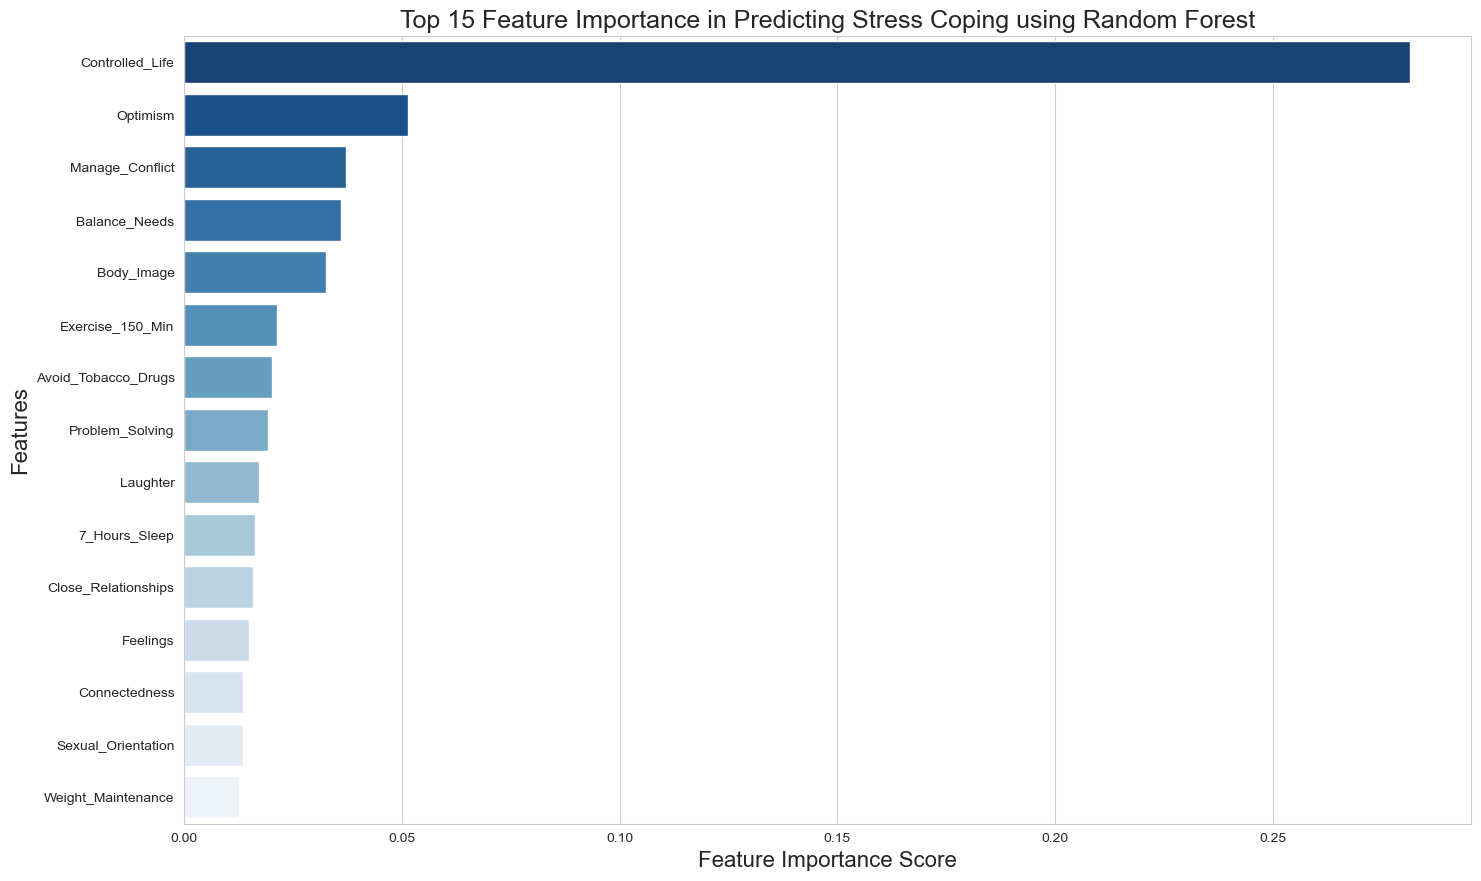

In [456]:
# Random Forest importance plot [FOR STRESS_COPING]

df_rf = pd.read_csv("PreTest_ReadyForRStudio.csv")

score_variables = ["Physical_Score", "Relational_Score", "Spiritual_Score", "Intellectual_Score", "Financial_Score"] # excluding these

X = df_rf.drop(columns=["Stress_Coping"] + score_variables)
y = df_rf["Stress_Coping"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Limit to top 15 most important features
top_15_importance_df = importance_df.head(15)

plt.figure(figsize=(16,10)) 
sns.barplot(x="Importance", y="Feature", data=top_15_importance_df, palette="Blues_r")

plt.xlabel("Feature Importance Score", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.title("Top 15 Feature Importance in Predicting Stress Coping using Random Forest", fontsize=18)

plt.tight_layout(pad=5.0) 

plt.show()

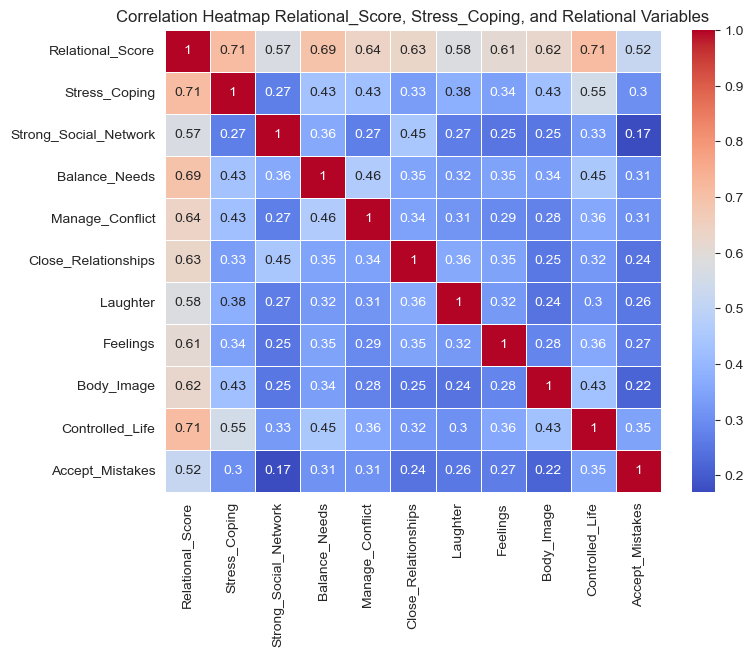

In [457]:
# Observing why Relational_Score is so important to predicting Stress_Coping [FOR STRESS_COPING]

corr = data[['Relational_Score', 'Stress_Coping', 'Strong_Social_Network', 'Balance_Needs', 'Manage_Conflict',
            'Close_Relationships', 'Laughter', 'Feelings', 'Body_Image', 'Controlled_Life', 'Accept_Mistakes']].corr()

plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap Relational_Score, Stress_Coping, and Relational Variables")
plt.show()

In [458]:
# ---- MULTIPLE LINEAR REGRESSION: PREDICTING PHYSICAL ACTIVITY AS A COPING MECHANISM ----
# Note: these are variables I assumed to be important. Output --> R^2 of 0.471. p-values are iffy.
# [FOR PHYSICAL_ACTIVITY_STRESS]

predictor_variables_physical = [
    "Exercise_150_Min", "Strength_Training", "Stress_Coping", "Feelings", "7_Hours_Sleep", "Controlled_Life", "Parent_Financial_Support",
    "Strong_Social_Network", "Balanced_Diet", "Close_Relationships", "Understand_Purpose"
]

X_physical = data[predictor_variables_physical] # indep variable
y_physical = data["Physical_Activity_Stress"] # dep variable
 
X_physical = X_physical.fillna(X_physical.mean())
y_physical = y_physical.fillna(y_physical.mean())

# Add a constant term for the regression model
X_physical = sm.add_constant(X_physical)

model_physical = sm.OLS(y_physical, X_physical).fit()

print(model_physical.summary())

                               OLS Regression Results                               
Dep. Variable:     Physical_Activity_Stress   R-squared:                       0.477
Model:                                  OLS   Adj. R-squared:                  0.471
Method:                       Least Squares   F-statistic:                     87.97
Date:                      Thu, 20 Mar 2025   Prob (F-statistic):          5.10e-141
Time:                              14:59:04   Log-Likelihood:                -1187.7
No. Observations:                      1075   AIC:                             2399.
Df Residuals:                          1063   BIC:                             2459.
Df Model:                                11                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [459]:
# ---- MULTIPLE LINEAR REGRESSION: PREDICTING PHYSICAL ACTIVITY AS A COPING MECHANISM ----
# Note: This is AFTER running stepwise regression in R.
# p-values are significant and R^2 is approximately 0.5
# [FOR PHYSICAL_ACTIVITY_STRESS]

clean_data = data.dropna()

final_predictors = [
    'Club_Sports', 'Social_Sorority/Fraternity',
    'Religious/Campus_Ministry', 'Exercise_150_Min', 
    'Strength_Training', 'Healthy_Meal_Choices',
    'Avoid_Alcohol', 'Regular_Medical_Visits', 'Manage_Conflict', 
    'Feelings', 'Body_Image', 'Learn_New_Things', 'Challenges_Growth', 'Current_Events', 
    'Personal_Values', 'Spirituality_Hardship', 'Track_Spending', 
    'Financial_Anxiety', 'Future_Financial_Plan', 'Contribution', 'Family_Grad_History', 
    'Controlled_Life', 'Openness', 'Budget' # Based on statistical significance
]

X_final = clean_data[final_predictors]
y_final = clean_data["Physical_Activity_Stress"]

X_final = sm.add_constant(X_final)

final_model = sm.OLS(y_final, X_final).fit()

print(final_model.summary())

# Analysis and interpretation:
# - Exercise and strength training remain strong positive predictors of using physical activity to cope with stress.
# - Involvement in club sports and social organizations (like sororities/fraternities) also seem to be beneficial.
# - The added predictors from R, like "Controlled_Life", "Openness", and "Budget", may provide additional insights into personal and financial factors affecting physical activity as a coping mechanism.

                               OLS Regression Results                               
Dep. Variable:     Physical_Activity_Stress   R-squared:                       0.511
Model:                                  OLS   Adj. R-squared:                  0.498
Method:                       Least Squares   F-statistic:                     41.67
Date:                      Thu, 20 Mar 2025   Prob (F-statistic):          1.08e-130
Time:                              14:59:04   Log-Likelihood:                -1054.9
No. Observations:                       983   AIC:                             2160.
Df Residuals:                           958   BIC:                             2282.
Df Model:                                24                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [493]:
# LOGISITIC REGRESSION for the above model [FOR PHYSICAL_ACTIVITY_STRESS]

clean_data = data.dropna()

final_predictors = [
    'Club_Sports', 'Social_Sorority/Fraternity',
    'Religious/Campus_Ministry', 'Exercise_150_Min', 
    'Strength_Training', 'Healthy_Meal_Choices',
    'Avoid_Alcohol', 'Regular_Medical_Visits', 'Manage_Conflict', 
    'Feelings', 'Body_Image', 'Learn_New_Things', 'Challenges_Growth', 'Current_Events', 
    'Personal_Values', 'Spirituality_Hardship', 'Track_Spending', 
    'Financial_Anxiety', 'Future_Financial_Plan', 'Contribution', 'Family_Grad_History', 
    'Controlled_Life', 'Openness', 'Budget' # Based on statistical significance
]

# Define X and y
X_final = clean_data[final_predictors]
y_final = clean_data["Physical_Activity_Stress"].astype(pd.CategoricalDtype(ordered=True))

# Fit an Ordinal Logistic Regression model
ordinal_model = OrderedModel(y_final, X_final, distr="logit")
result = ordinal_model.fit(method="bfgs")

# Print the summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.961177
         Iterations: 62
         Function evaluations: 65
         Gradient evaluations: 65
                                OrderedModel Results                                
Dep. Variable:     Physical_Activity_Stress   Log-Likelihood:                -944.84
Model:                         OrderedModel   AIC:                             1944.
Method:                  Maximum Likelihood   BIC:                             2076.
Date:                      Thu, 20 Mar 2025                                         
Time:                              16:53:02                                         
No. Observations:                       983                                         
Df Residuals:                           956                                         
Df Model:                                24                                         
                                 coef    std err          z    

C:\Users\wolzi\AppData\Local\Temp\ipykernel_19176\858894575.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_15_importance_df, palette="Blues_r")


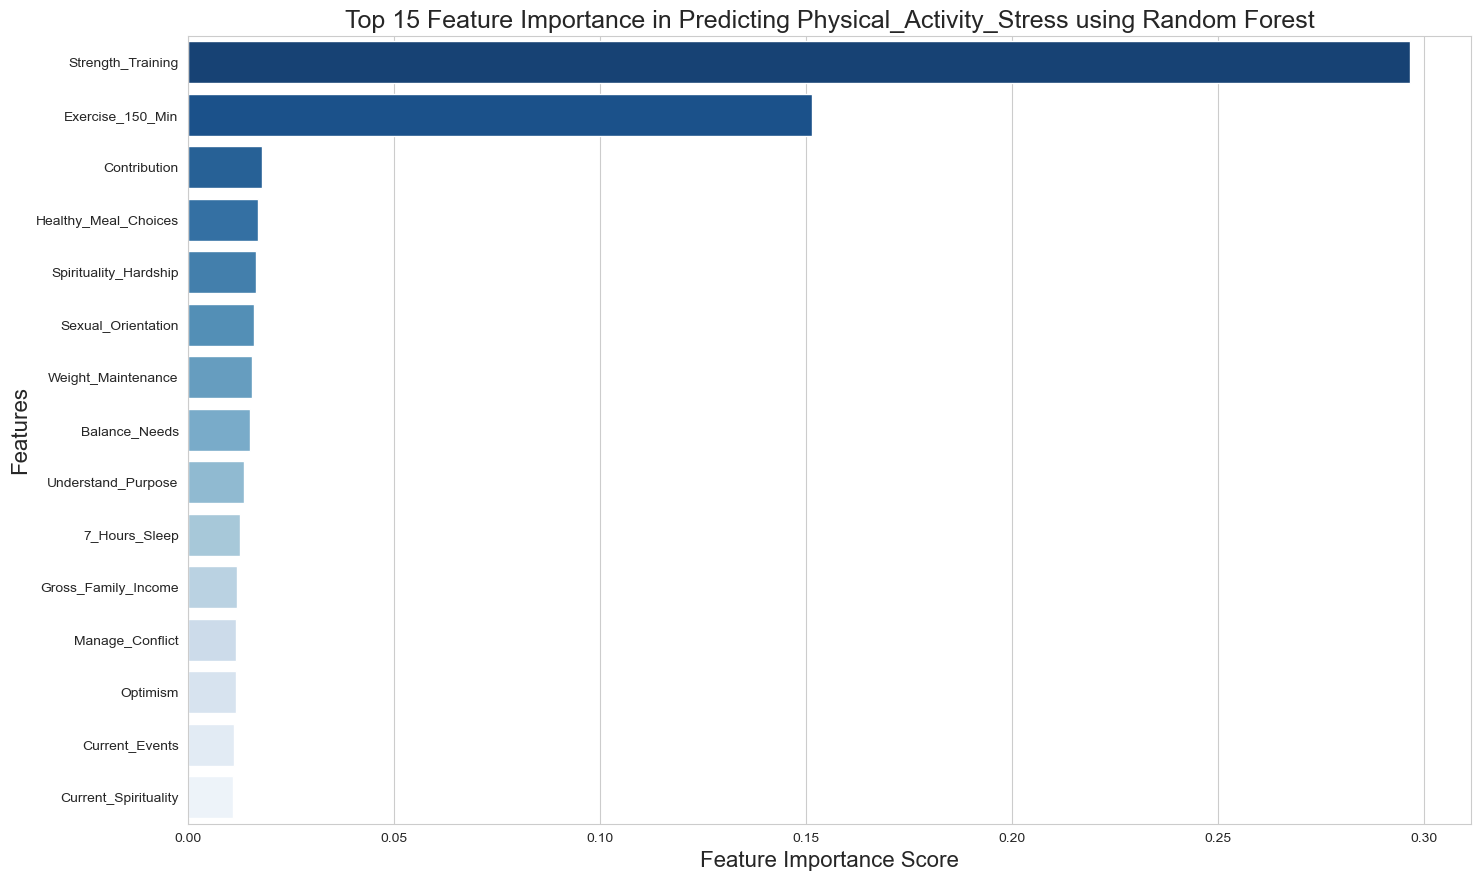

In [521]:
# Random Forest Variable Importance plot for Physical_Activity_Stress without gradient boosting

# This model DOES NOT take into account the ordinal nature of Physical_Activity_Stress

# Exclude the score variables
score_variables = ["Physical_Score", "Relational_Score", "Spiritual_Score", "Intellectual_Score", "Financial_Score"]

X = df_rf.drop(columns=["Physical_Activity_Stress"] + score_variables)
y = df_rf["Physical_Activity_Stress"]  # Change target variable to Physical_Activity_Stress

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Limit to top 15 most important features
top_15_importance_df = importance_df.head(15)

plt.figure(figsize=(16,10)) 
sns.barplot(x="Importance", y="Feature", data=top_15_importance_df, palette="Blues_r")

plt.xlabel("Feature Importance Score", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.title("Top 15 Feature Importance in Predicting Physical_Activity_Stress using Random Forest", fontsize=18)

plt.tight_layout(pad=5.0) 

plt.show()

C:\Users\wolzi\AppData\Local\Temp\ipykernel_19176\2729304396.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=top_15_coef_df, palette="Blues_r")


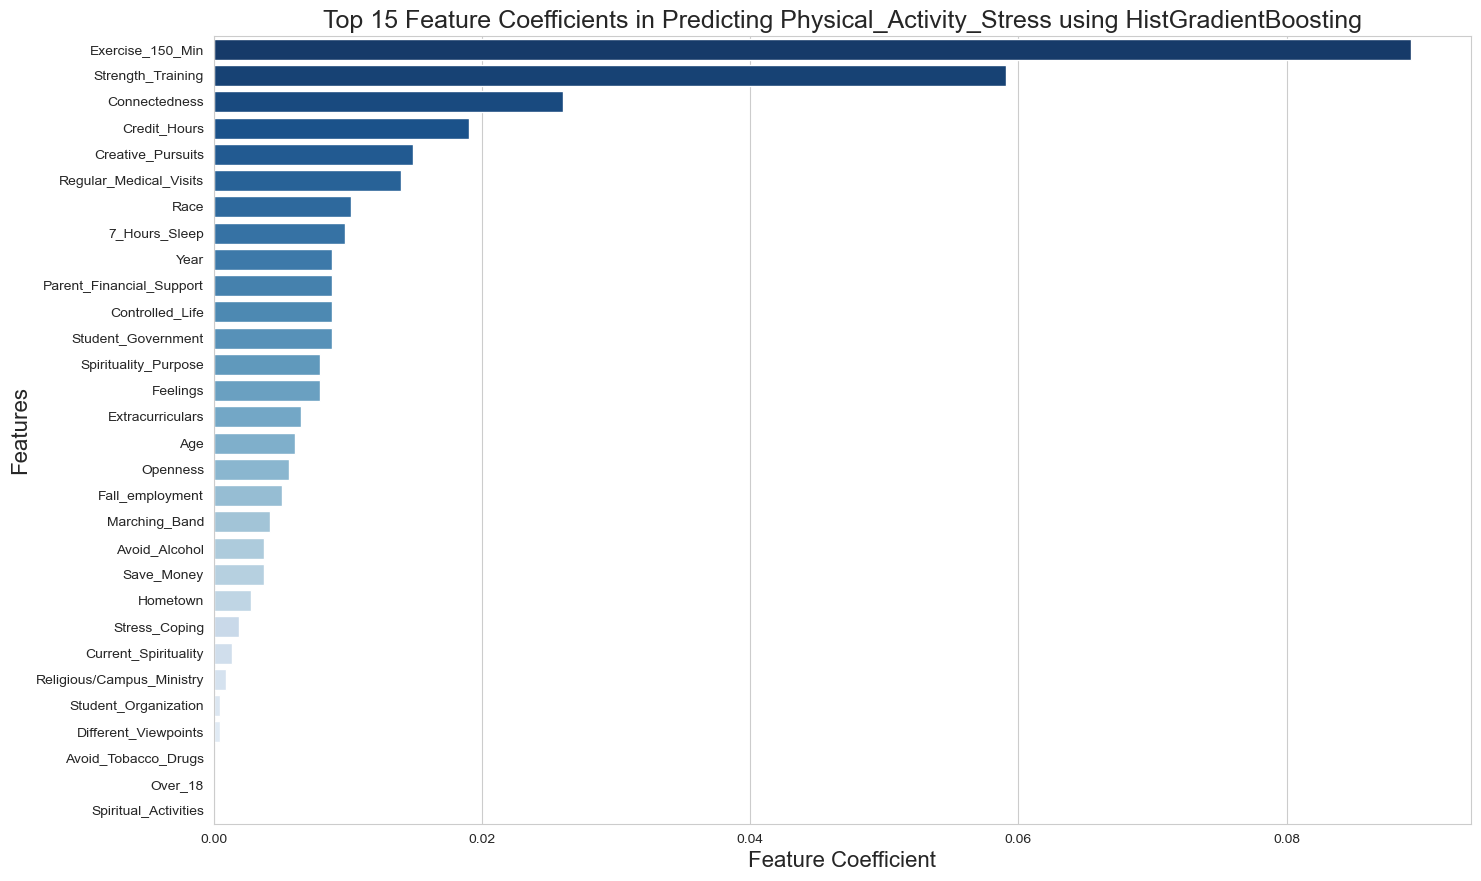

In [527]:
# Random Forest Variable Importance plot [FOR PHYSICAL_ACTIVITY_STRESS] via Gradient Boosting

# this model DOES account for the ordinal nature of Physical_Activity_Stress

# Exclude the score variables
score_variables = ["Physical_Score", "Relational_Score", "Spiritual_Score", "Intellectual_Score", "Financial_Score"]

df_rf = df_rf.dropna(subset=["Physical_Activity_Stress"])

X = df_rf.drop(columns=["Physical_Activity_Stress"] + score_variables)
y = df_rf["Physical_Activity_Stress"]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use HistGradientBoostingClassifier (supports ordinal regression)
rf_ordinal = HistGradientBoostingClassifier(loss="log_loss", random_state=42)  # Fixed loss parameter
rf_ordinal.fit(X_train_scaled, y_train)

# Calculate permutation importance
result = permutation_importance(rf_ordinal, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for feature importances
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': result.importances_mean})

# Sort by coefficients to see the most important features
coef_df = coef_df.sort_values(by="Coefficient", ascending=False)

# Limit to top 15 most important features
top_15_coef_df = coef_df.head(30)

# Plot Feature Coefficients
plt.figure(figsize=(16, 10))
sns.barplot(x="Coefficient", y="Feature", data=top_15_coef_df, palette="Blues_r")

plt.xlabel("Feature Coefficient", fontsize=16)
plt.ylabel("Features", fontsize=16)
plt.title("Top 15 Feature Coefficients in Predicting Physical_Activity_Stress using HistGradientBoosting", fontsize=18)

plt.tight_layout(pad=5.0)
plt.show()


C:\Users\wolzi\AppData\Local\Temp\ipykernel_19176\932038398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Club_Sports', y='Physical_Activity_Stress', data=data, palette='Set2')


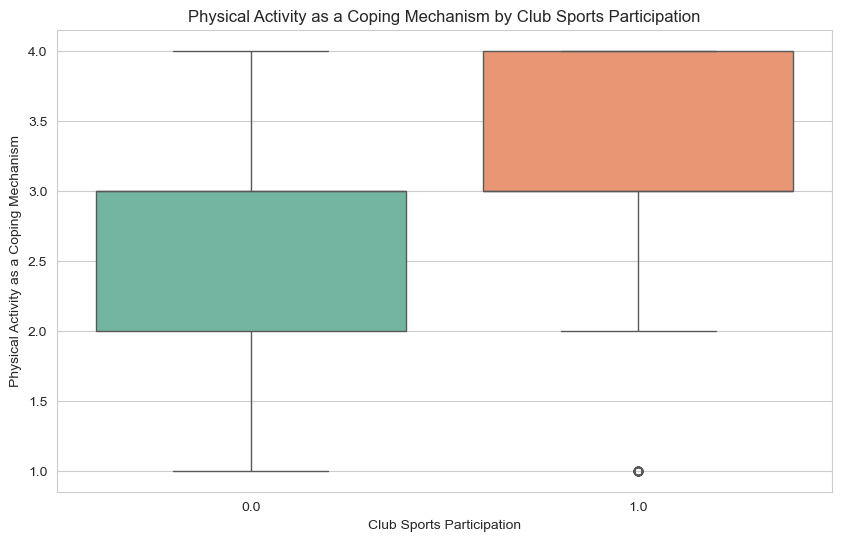

In [534]:
# Box plots for categorical predictors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Club_Sports', y='Physical_Activity_Stress', data=data, palette='Set2')
plt.title('Physical Activity as a Coping Mechanism by Club Sports Participation')
plt.xlabel('Club Sports Participation')
plt.ylabel('Physical Activity as a Coping Mechanism')
plt.show()

C:\Users\wolzi\AppData\Local\Temp\ipykernel_19176\834241922.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Predictor', data=coef_df, palette='viridis')


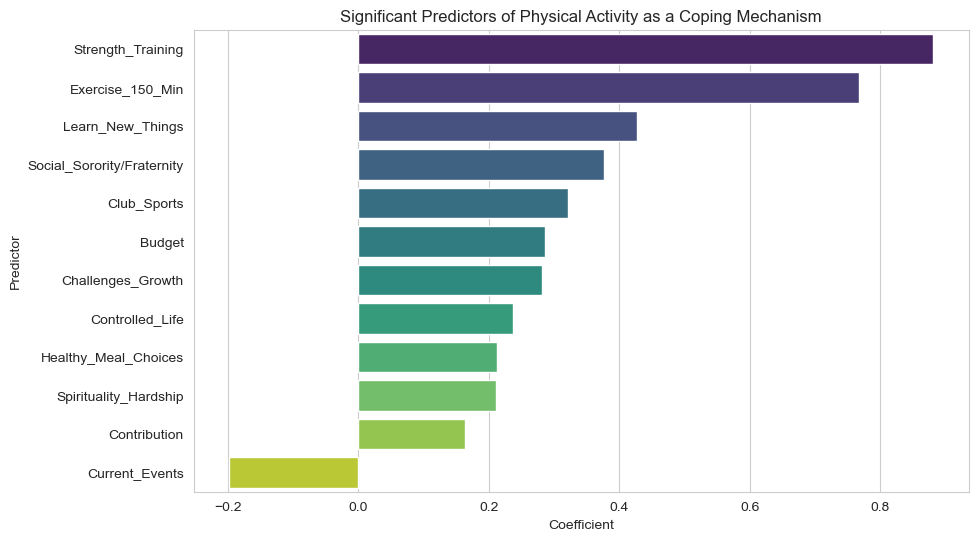

In [538]:
# BARPLOT of the statistically significant predictors from the logistic regression model

# Filter significant predictors (p < 0.05)
significant_predictors = {
    'Club_Sports': 0.3207,
    'Social_Sorority/Fraternity': 0.3769,
    'Exercise_150_Min': 0.7669,
    'Strength_Training': 0.8814,
    'Healthy_Meal_Choices': 0.2131,
    'Learn_New_Things': 0.4268,
    'Challenges_Growth': 0.2816,
    'Current_Events': -0.1986,
    'Spirituality_Hardship': 0.2111,
    'Contribution': 0.1643,
    'Controlled_Life': 0.2375,
    'Budget': 0.2863
}

coef_df = pd.DataFrame(list(significant_predictors.items()), columns=['Predictor', 'Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Predictor', data=coef_df, palette='viridis')
plt.title('Significant Predictors of Physical Activity as a Coping Mechanism')
plt.xlabel('Coefficient')
plt.ylabel('Predictor')
plt.show()